## **Score detection**

### **Chargement de dataset**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import zipfile  
import json

print("VÉRIFICATION DES FICHIERS")
print("Fichiers dans le répertoire courant:")
for file in os.listdir('.'):
    if file.endswith('.csv') or file.endswith('.zip'):
        print(f"  - {file}")

print("\nFichiers dans ./digit_data/:")
if os.path.exists('./digit_data/'):
    for file in os.listdir('./digit_data/'):
        print(f"  - {file}")
else:
    print("  Dossier ./digit_data/ n'existe pas")

if not os.path.exists('./digit_data/train.csv') and not os.path.exists('train.csv'):
    print("\nTÉLÉCHARGEMENT DU DATASET")
    
    kaggle_dir = os.path.expanduser("~/.kaggle")
    os.makedirs(kaggle_dir, exist_ok=True)
    
    kaggle_credentials = {
        "username": "aminesaadi", # à remplacer 
        "key": "" # à remplacer 
    }
    
    cred_file = os.path.join(kaggle_dir, "kaggle.json")
    with open(cred_file, 'w') as f:
        json.dump(kaggle_credentials, f)
    os.chmod(cred_file, 0o600)
    
   
    
    try:
        print("Téléchargement en cours...")
        result = subprocess.run(['kaggle', 'competitions', 'download', '-c', 'digit-recognizer'], 
                              capture_output=True, text=True, check=True)
        print("Téléchargement réussi!")
        
        if os.path.exists('digit-recognizer.zip'):
            data_dir = "./digit_data"
            os.makedirs(data_dir, exist_ok=True)
            
            with zipfile.ZipFile('digit-recognizer.zip', 'r') as zip_ref:
                zip_ref.extractall(data_dir)
            print(f"Fichiers extraits dans {data_dir}/")
        else:
            print("Fichier zip non trouvé")
            
    except Exception as e:
        print(f"Erreur: {e}")

print("\nCHARGEMENT DES DONNÉES")

train_paths = [
    'train.csv',
    './digit_data/train.csv',
    './digit_data/train.csv'
]

train_data = None
for path in train_paths:
    if os.path.exists(path):
        train_data = pd.read_csv(path)
        break

if train_data is not None:
    print(f"Données chargées: {train_data.shape}")
    
    # Séparation des features et labels
    y_train = train_data['label'].values
    x_train = train_data.drop('label', axis=1).values
    
    # Normalisation des pixels (0-255 -> 0-1)
    x_train = x_train.astype('float32') / 255.0
    
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"Classes uniques: {np.unique(y_train)}")
else:
    print("Aucune donnée d'entraînement trouvée")

VÉRIFICATION DES FICHIERS
Fichiers dans le répertoire courant:
  - detections_with_teams.csv
  - digit-recognizer.zip

Fichiers dans ./digit_data/:
  - test.csv
  - train.csv
  - sample_submission.csv

CHARGEMENT DES DONNÉES
Données chargées: (42000, 785)
x_train shape: (42000, 784)
y_train shape: (42000,)
Classes uniques: [0 1 2 3 4 5 6 7 8 9]


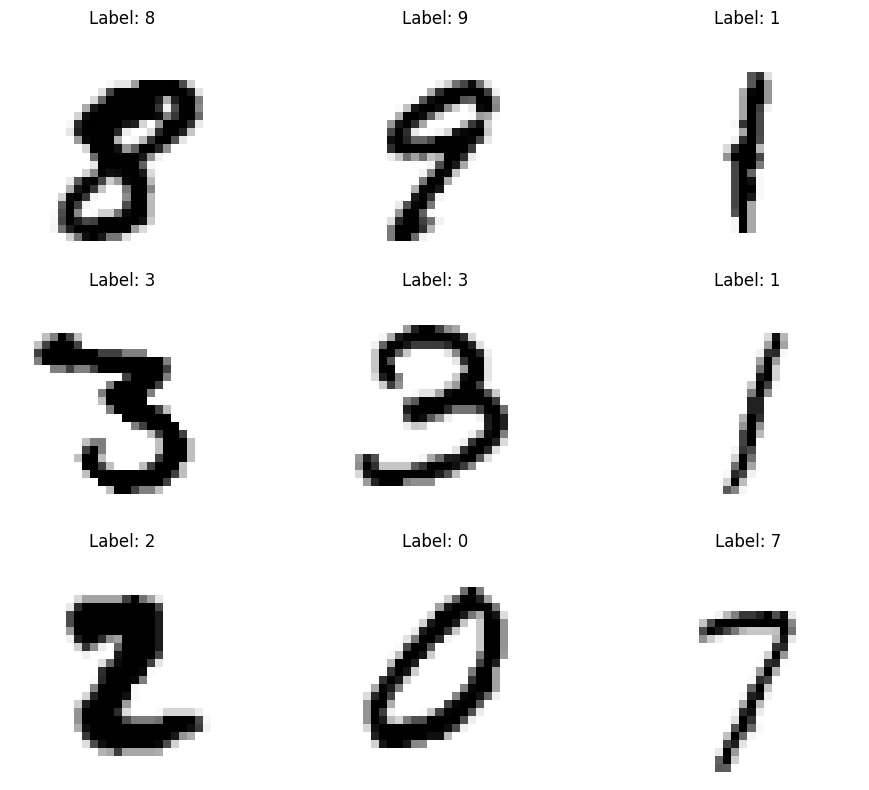

In [7]:
# Visualisation des échantillons
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i+10].reshape(28,28), cmap=plt.cm.binary)
    plt.title(f'Label: {y_train[i+10]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


### KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Chargement des données
data = pd.read_csv('./digit_data/train.csv')

# Préparation des données
x = data.drop('label', axis=1).values
y = data['label'].values

# Division train/test
num_train = 38000
x_train, x_test, y_train, y_test = x[:num_train], x[num_train:], y[:num_train], y[num_train:]

# Entraînement du modèle
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print("Modèle KNN entraîné avec succès!")
print(f"Données d'entraînement: {x_train.shape}")
print(f"Données de test: {x_test.shape}")

Modèle KNN entraîné avec succès!
Données d'entraînement: (38000, 784)
Données de test: (4000, 784)


In [11]:
x_test.shape
gues= knn.predict(x_test)
gues

/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aminesaadi/Desktop/Basket/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([5, 7, 5, ..., 7, 6, 9])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,gues)

confusion_matrix(y_test,gues)

array([[428,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0, 442,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   3, 353,   1,   0,   0,   0,  11,   0,   1],
       [  1,   0,   2, 411,   0,   4,   0,   1,   1,   1],
       [  0,   3,   0,   0, 409,   0,   2,   0,   1,   7],
       [  1,   1,   0,   3,   0, 320,   4,   0,   2,   3],
       [  0,   0,   0,   0,   1,   1, 398,   0,   0,   0],
       [  0,   3,   2,   0,   1,   0,   0, 390,   0,   5],
       [  2,  16,   1,   5,   2,   5,   0,   1, 343,   4],
       [  1,   1,   2,   1,   4,   2,   0,   5,   1, 382]])

### Neural Networks

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


y_train = to_categorical(y_train)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Modèle ultra-dense
model_dense = Sequential([
    Dense(2048, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.1),
    
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model_dense.compile(loss='categorical_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])


callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
]

history_dense = model_dense.fit(x_train, y_train, 
                               epochs=50, 
                               batch_size=64, 
                               validation_split=0.2,
                               callbacks=callbacks,
                               verbose=1)

model_dense.save('./models/digits_dense_ultra.h5')
print("Modèle dense ultra sauvegardé")

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.layers import SeparableConv2D, DepthwiseConv2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

x_train_conv = x_train.reshape(-1, 28, 28, 1)
x_test_conv = x_test.reshape(-1, 28, 28, 1)

model_conv = Sequential([
    # Premier bloc
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # 28x28 → 14x14
    Dropout(0.25),
    
    # Deuxième bloc
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # 14x14 → 7x7
    Dropout(0.25),
    
    # Troisième bloc
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),  # 7x7 → 128
    Dropout(0.25),
    
    # Classificateur
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_conv.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
]

history_conv = model_conv.fit(x_train_conv, y_train, 
                             epochs=30, 
                             batch_size=128, 
                             validation_split=0.2,
                             callbacks=callbacks,
                             verbose=1)

model_conv.save('./models/digits_conv_advanced.h5')
print("Modèle Conv2D avancé sauvegardé")

In [ ]:
from keras.layers import Input, concatenate
from keras.models import Model

def create_hybrid_model():
    input_layer = Input(shape=(28, 28, 1))
    
    # Branche Conv2D avec padding
    conv_branch = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    conv_branch = BatchNormalization()(conv_branch)
    conv_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_branch)
    conv_branch = MaxPooling2D((2, 2))(conv_branch)  # 28x28 → 14x14
    conv_branch = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_branch)
    conv_branch = GlobalAveragePooling2D()(conv_branch)  # 14x14 → 128
    
    # Branche Dense (sur l'image flatten)
    dense_branch = Flatten()(input_layer)
    dense_branch = Dense(512, activation='relu')(dense_branch)
    dense_branch = BatchNormalization()(dense_branch)
    dense_branch = Dropout(0.3)(dense_branch)
    dense_branch = Dense(256, activation='relu')(dense_branch)
    dense_branch = Dropout(0.2)(dense_branch)
    
    # Fusion des branches
    merged = concatenate([conv_branch, dense_branch])
    merged = Dense(512, activation='relu')(merged)
    merged = BatchNormalization()(merged)
    merged = Dropout(0.4)(merged)
    merged = Dense(256, activation='relu')(merged)
    merged = Dropout(0.3)(merged)
    output = Dense(10, activation='softmax')(merged)
    
    model = Model(inputs=input_layer, outputs=output)
    return model

model_hybrid = create_hybrid_model()
model_hybrid.compile(loss='categorical_crossentropy',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])


history_hybrid = model_hybrid.fit(x_train_conv, y_train, 
                                 epochs=25, 
                                 batch_size=64, 
                                 validation_split=0.2,
                                 callbacks=callbacks,
                                 verbose=1)

model_hybrid.save('./models/digits_hybrid.h5')
print("Modèle hybride sauvegardé")

In [ ]:
import numpy as np


if len(y_train.shape) == 2 and y_train.shape[1] == 10:
    y_train_labels = np.argmax(y_train, axis=1)
    print("y_train converti de one-hot vers labels entiers")
else:
    y_train_labels = y_train
    print("y_train déjà en labels entiers")

if len(y_test.shape) == 2 and y_test.shape[1] == 10:
    y_test_labels = np.argmax(y_test, axis=1)
    print("y_test converti de one-hot vers labels entiers")
else:
    y_test_labels = y_test
    print("y_test déjà en labels entiers")


# Modèle avec sparse_categorical_crossentropy
model_sparse = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # 28x28 → 14x14
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # 14x14 → 7x7
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),  # 7x7 → 256
    Dropout(0.25),
    
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_sparse.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])

print(f"Paramètres Sparse: {model_sparse.count_params():,}")

print("\nTEST AVEC UN PETIT BATCH")
test_batch_x = x_train_conv[:32]
test_batch_y = y_train_labels[:32]
print(f"Test batch x shape: {test_batch_x.shape}")
print(f"Test batch y shape: {test_batch_y.shape}")

test_pred = model_sparse.predict(test_batch_x, verbose=0)
print(f"Test prediction shape: {test_pred.shape}")

test_loss = model_sparse.evaluate(test_batch_x, test_batch_y, verbose=0)
print(f"Test loss: {test_loss}")

history_sparse = model_sparse.fit(x_train_conv, y_train_labels,
                                 epochs=40, 
                                 batch_size=64,
                                 validation_data=(x_test_conv, y_test_labels),
                                 callbacks=callbacks,
                                 verbose=1)

model_sparse.save('./models/digits_conv_sparse.h5')
print("Modèle Conv2D sparse sauvegardé")

In [ ]:
import numpy as np

if len(y_train.shape) == 2 and y_train.shape[1] == 10:
    y_train_labels = np.argmax(y_train, axis=1)
    print("y_train converti de one-hot vers labels entiers")
else:
    y_train_labels = y_train
    print("y_train déjà en labels entiers")

if len(y_test.shape) == 2 and y_test.shape[1] == 10:
    y_test_labels = np.argmax(y_test, axis=1)
    print("y_test converti de one-hot vers labels entiers")
else:
    y_test_labels = y_test
    print("y_test déjà en labels entiers")

model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_simple.compile(loss='sparse_categorical_crossentropy',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])

print(f"Paramètres Simple: {model_simple.count_params():,}")

print("\nTEST AVEC UN PETIT BATCH")
test_batch_x = x_train_conv[:32]
test_batch_y = y_train_labels[:32]
print(f"Test batch x shape: {test_batch_x.shape}")
print(f"Test batch y shape: {test_batch_y.shape}")

test_pred = model_simple.predict(test_batch_x, verbose=0)
print(f"Test prediction shape: {test_pred.shape}")

test_loss = model_simple.evaluate(test_batch_x, test_batch_y, verbose=0)
print(f"Test loss: {test_loss}")

history_simple = model_simple.fit(x_train_conv, y_train_labels,
                                 epochs=20, 
                                 batch_size=128,
                                 validation_data=(x_test_conv, y_test_labels),
                                 verbose=1)

model_simple.save('./models/digits_conv_simple.h5')
print("Modèle Conv2D simple sauvegardé")

In [ ]:
def comparer_tous_modeles_final():
    """Compare les performances de tous les modèles créés - version finale"""
    import matplotlib.pyplot as plt
    import os
    
    modeles_fichiers = {
        'Conv2D Simple': './models/digits_conv_simple.h5',
        'Conv2D Sparse': './models/digits_conv_sparse.h5',
        'DigitClassifier': './models/DigitClassifier.keras'
    }
    
    modeles_charges = {}
    
    for nom, chemin in modeles_fichiers.items():
        if os.path.exists(chemin):
            try:
                if chemin.endswith('.keras'):
                    model = load_model(chemin)
                else:
                    model = load_model(chemin)
                modeles_charges[nom] = model
                print(f" {nom} chargé")
            except Exception as e:
                print(f" Erreur {nom}: {e}")
    
    print(f"\nCOMPARAISON DE {len(modeles_charges)} MODÈLES")
    
    results = {}
    
    for nom, modele in modeles_charges.items():
        try:
            if 'Conv2D Simple' in nom or 'Conv2D Sparse' in nom:
                test_loss, test_acc = modele.evaluate(x_test_conv, y_test_labels, verbose=0)
            elif 'DigitClassifier' in nom:
                test_loss, test_acc = modele.evaluate(x_test_conv, y_test_cat, verbose=0)
            
            results[nom] = {
                'accuracy': test_acc,
                'loss': test_loss,
                'params': modele.count_params()
            }
            
            print(f"{nom}:")
            print(f"  Précision: {test_acc:.4f}")
            print(f"  Loss: {test_loss:.4f}")
            print(f"  Paramètres: {modele.count_params():,}")
            print()
            
        except Exception as e:
            print(f" Erreur {nom}: {e}")
    
    # Graphique de comparaison
    if results:
        noms = list(results.keys())
        accuracies = [results[nom]['accuracy'] for nom in noms]
        params = [results[nom]['params'] for nom in noms]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Graphique de précision
        colors = ['blue', 'green', 'orange']
        bars1 = ax1.bar(noms, accuracies, color=colors[:len(noms)])
        ax1.set_title('Précision des modèles', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Précision')
        ax1.set_ylim(0.98, 1.0)  # Zoom sur la zone de haute précision
        ax1.tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs sur les barres
        for bar, acc in zip(bars1, accuracies):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
                    f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
        
        # Graphique des paramètres
        bars2 = ax2.bar(noms, params, color=colors[:len(noms)])
        ax2.set_title('Nombre de paramètres', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Paramètres (log scale)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.set_yscale('log')
        
        # Ajouter les valeurs sur les barres
        for bar, param in zip(bars2, params):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height * 1.1,
                    f'{param:,}', ha='center', va='bottom', rotation=90, fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        print("\n" + "="*80)
        print(" RÉSULTATS FINAUX - CLASSEMENT PAR PERFORMANCE")
        print("="*80)
        print(f"{'Rang':<4} {'Modèle':<20} {'Précision':<10} {'Loss':<10} {'Paramètres':<15} {'Efficacité':<10}")
        print("-"*80)
        
        sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
        
        for i, (nom, data) in enumerate(sorted_results, 1):
            acc = data['accuracy']
            loss = data['loss']
            param = data['params']
            # Efficacité = précision / log(paramètres)
            efficacite = acc / np.log10(param) if param > 0 else 0
        
            
        print("\n" + "="*80)
        print(" ANALYSE DES RÉSULTATS")
        print("="*80)
        
        # Meilleur modèle
        best_model = sorted_results[0]
        print(f" MEILLEUR MODÈLE: {best_model[0]}")
        print(f"   Précision: {best_model[1]['accuracy']:.4f} ({best_model[1]['accuracy']*100:.2f}%)")
        print(f"   Paramètres: {best_model[1]['params']:,}")
        
        # Modèle le plus efficace
        most_efficient = max(results.items(), key=lambda x: x[1]['accuracy'] / np.log10(x[1]['params']))
        print(f"\n⚡ MODÈLE LE PLUS EFFICACE: {most_efficient[0]}")
        print(f"   Efficacité: {most_efficient[1]['accuracy'] / np.log10(most_efficient[1]['params']):.3f}")
        
        # Recommandations
        print(f"\n RECOMMANDATIONS:")
        if best_model[1]['params'] < 200000:
            print(f"   • {best_model[0]} est un excellent choix (haute précision, peu de paramètres)")
        else:
            print(f"   • {best_model[0]} a la meilleure précision mais nécessite plus de ressources")
            print(f"   • {most_efficient[0]} offre le meilleur compromis précision/efficacité")
    
    return results

# Lancer la comparaison finale
results = comparer_tous_modeles_final()

### Application on video

Chargement des modèles...
Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.


num_classes mismatch: pretrain weights has 9 classes, but your model has 90 classes
reinitializing detection head with 9 classes


Loading pretrain weights
 Modèle RF-DETR optimisé pour l'inférence
  Modèle sur CPU
Modèles chargés

=== ANALYSE DE 8 IMAGES FINALES ===
Visualisations sauvegardées dans: output/visualisations

ANALYSE DE: final1.png
=== DÉTECTION DE SCORES - final1.png ===
Scores détectés: 1

--- SCORE 1 ---
Coordonnées: (1862, 1288, 1974, 1372)
Confiance détection: 0.778
Taille crop: 112x84
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 8 (conf: 0.997)
      Chiffre 2:
        DigitClassifier: 2 (conf: 0.526)
      Score final: 82 (conf: 0.761)
Chiffres segmentés: 2
Score final: 82 (conf: 0.761)
Visualisation sauvegardée: output/visualisations/final1/visualisation_score_1.png


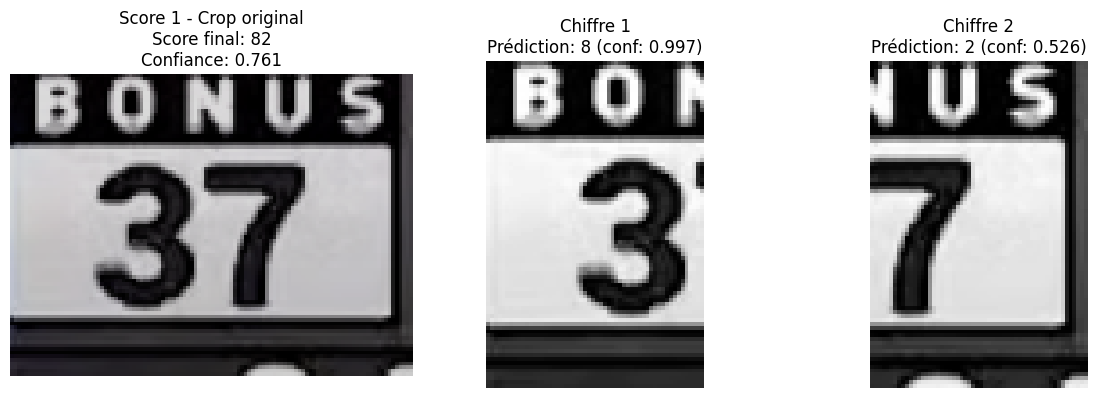


RÉSUMÉ POUR final1.png:
  Score 1: 82 (conf: 0.761)

ANALYSE DE: final2.png
=== DÉTECTION DE SCORES - final2.png ===
Scores détectés: 3

--- SCORE 1 ---
Coordonnées: (445, 1425, 589, 1527)
Confiance détection: 0.911
Taille crop: 144x102
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 4 (conf: 0.993)
      Chiffre 2:
        DigitClassifier: 9 (conf: 0.784)
      Score final: 49 (conf: 0.888)
Chiffres segmentés: 2
Score final: 49 (conf: 0.888)

--- SCORE 2 ---
Coordonnées: (640, 1424, 788, 1529)
Confiance détection: 0.886
Taille crop: 148x105
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 5 (conf: 0.989)
      Chiffre 2:
        DigitClassifier: 3 (conf: 0.457)
      Score final: 53 (conf: 0.723)
Chiffres segmentés: 2
Score final: 53 (conf: 0.723)
Visualisation sauvegardée: output/visualisations/final2/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final2/visualisation_score_2.png


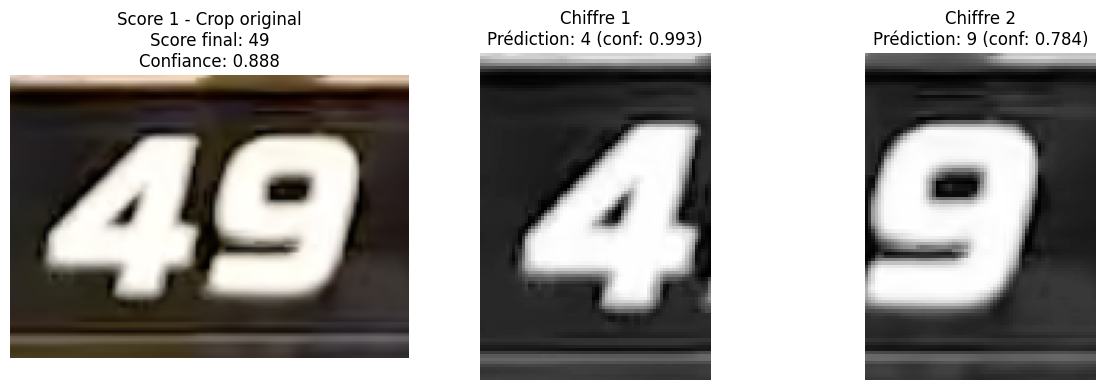

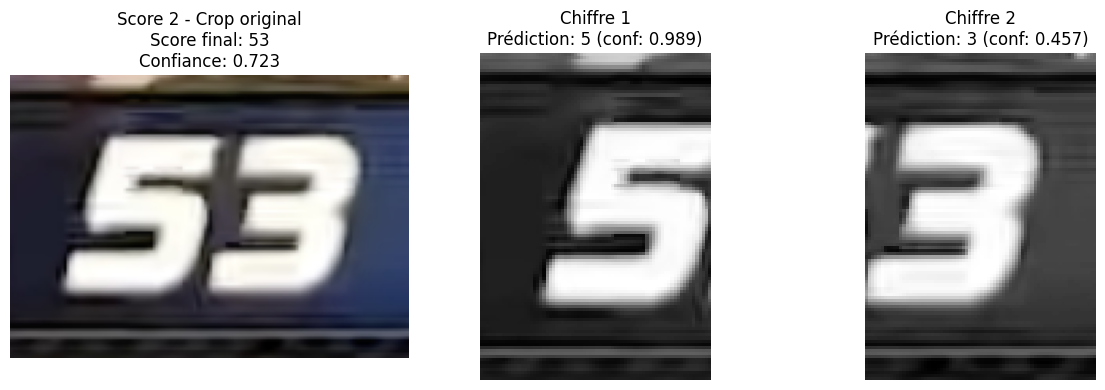


RÉSUMÉ POUR final2.png:
  Score 1: 49 (conf: 0.888)
  Score 2: 53 (conf: 0.723)

ANALYSE DE: final3.png
=== DÉTECTION DE SCORES - final3.png ===
Scores détectés: 4

--- SCORE 1 ---
Coordonnées: (447, 1425, 598, 1529)
Confiance détection: 0.913
Taille crop: 151x104
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 5 (conf: 0.869)
      Chiffre 2:
        DigitClassifier: 2 (conf: 0.603)
      Score final: 52 (conf: 0.736)
Chiffres segmentés: 2
Score final: 52 (conf: 0.736)

--- SCORE 2 ---
Coordonnées: (642, 1424, 794, 1527)
Confiance détection: 0.895
Taille crop: 152x103
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 4 (conf: 0.905)
      Chiffre 2:
        DigitClassifier: 9 (conf: 0.593)
      Score final: 49 (conf: 0.749)
Chiffres segmentés: 2
Score final: 49 (conf: 0.749)
Visualisation sauvegardée: output/visualisations/final3/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final3/visualisation_score_2.png


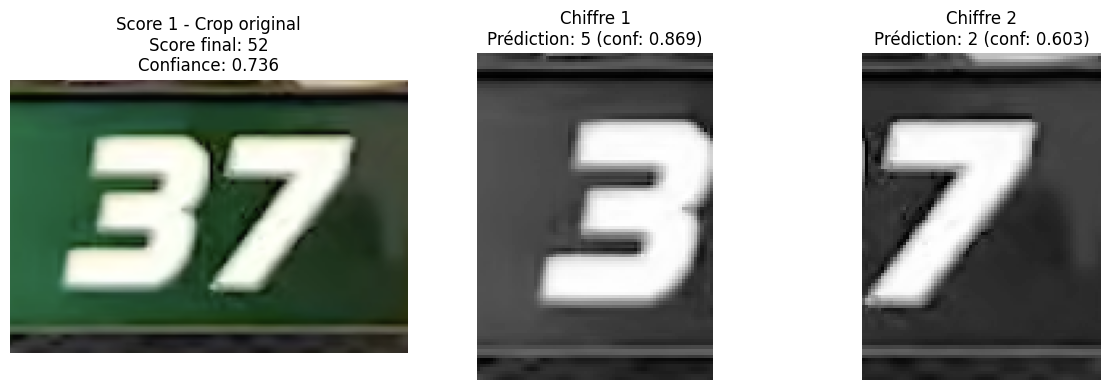

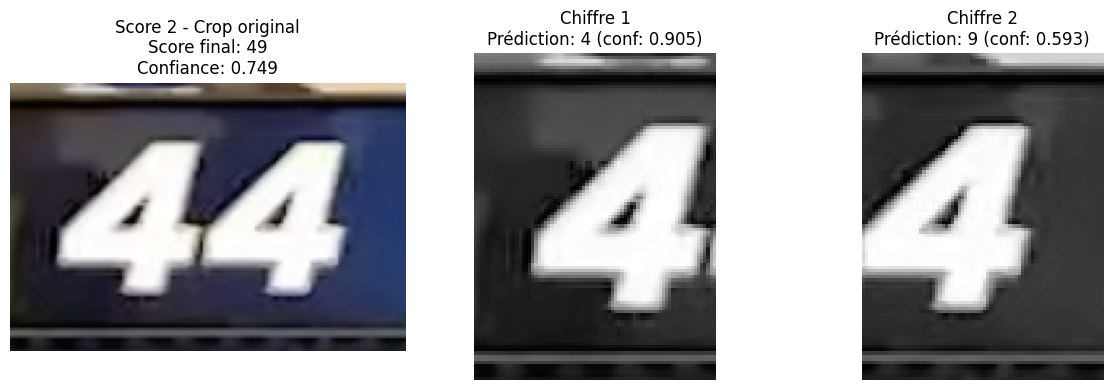


RÉSUMÉ POUR final3.png:
  Score 1: 52 (conf: 0.736)
  Score 2: 49 (conf: 0.749)

ANALYSE DE: final4.png
=== DÉTECTION DE SCORES - final4.png ===
Scores détectés: 2

--- SCORE 1 ---
Coordonnées: (2144, 1291, 2247, 1372)
Confiance détection: 0.742
Taille crop: 103x81
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 6 (conf: 0.419)
      Chiffre 2:
        DigitClassifier: 3 (conf: 0.737)
      Score final: 63 (conf: 0.578)
Chiffres segmentés: 2
Score final: 63 (conf: 0.578)

--- SCORE 2 ---
Coordonnées: (1861, 1294, 1971, 1374)
Confiance détection: 0.702
Taille crop: 110x80
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 6 (conf: 0.767)
      Chiffre 2:
        DigitClassifier: 3 (conf: 0.455)
      Score final: 63 (conf: 0.611)
Chiffres segmentés: 2
Score final: 63 (conf: 0.611)
Visualisation sauvegardée: output/visualisations/final4/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final4/visualisation_score_2.png


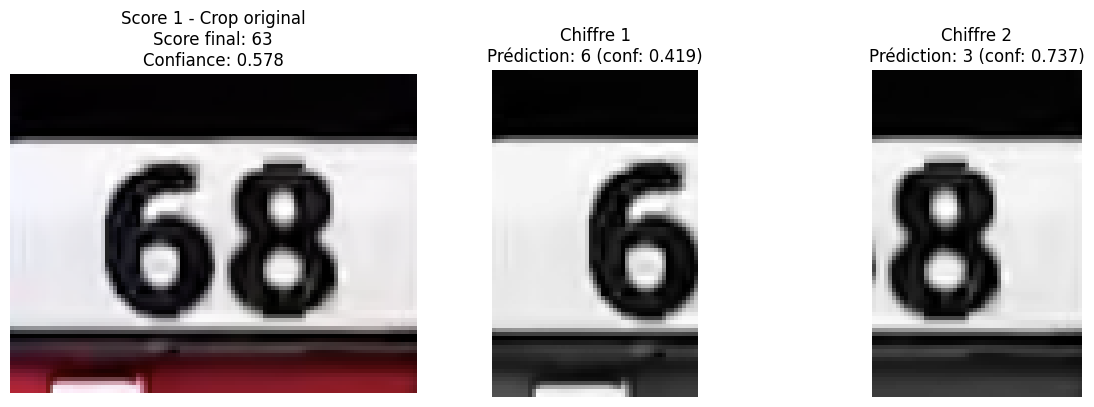

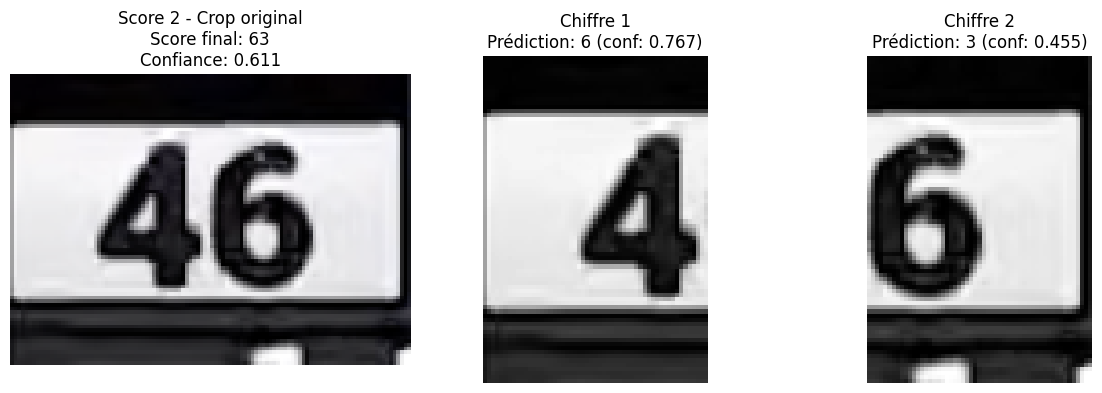


RÉSUMÉ POUR final4.png:
  Score 1: 63 (conf: 0.578)
  Score 2: 63 (conf: 0.611)

ANALYSE DE: final5.png
=== DÉTECTION DE SCORES - final5.png ===
Scores détectés: 2

--- SCORE 1 ---
Coordonnées: (444, 1430, 590, 1532)
Confiance détection: 0.918
Taille crop: 146x102
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 5 (conf: 0.949)
      Chiffre 2:
        DigitClassifier: 3 (conf: 0.890)
      Score final: 53 (conf: 0.919)
Chiffres segmentés: 2
Score final: 53 (conf: 0.919)

--- SCORE 2 ---
Coordonnées: (639, 1432, 826, 1533)
Confiance détection: 0.898
Taille crop: 187x101
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 2 (conf: 0.650)
      Chiffre 2:
        DigitClassifier: 0 (conf: 0.599)
      Score final: 20 (conf: 0.624)
Chiffres segmentés: 2
Score final: 20 (conf: 0.624)
Visualisation sauvegardée: output/visualisations/final5/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final5/visualisation_score_2.png


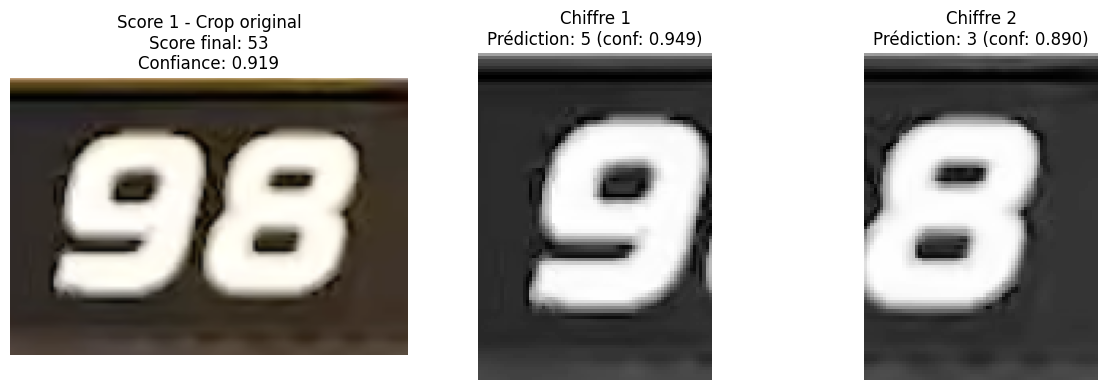

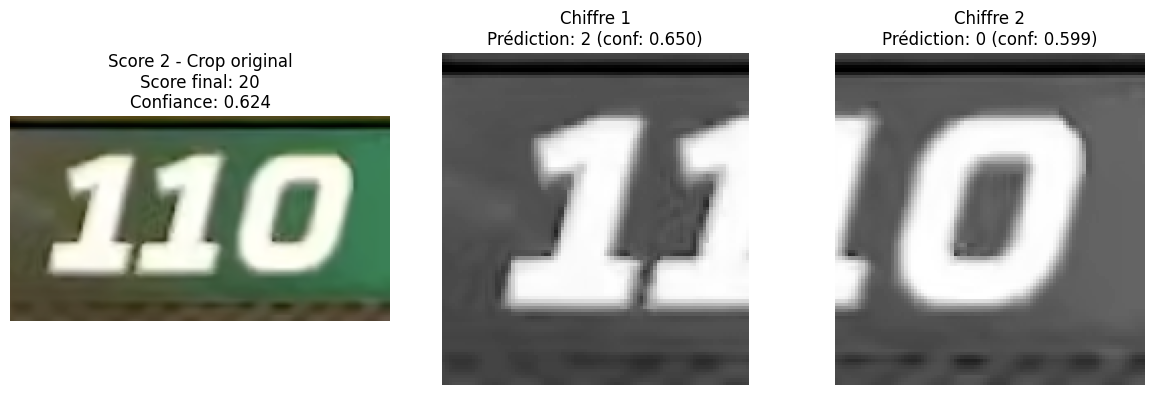


RÉSUMÉ POUR final5.png:
  Score 1: 53 (conf: 0.919)
  Score 2: 20 (conf: 0.624)

ANALYSE DE: final6.png
=== DÉTECTION DE SCORES - final6.png ===
Scores détectés: 2

--- SCORE 1 ---
Coordonnées: (437, 1427, 591, 1528)
Confiance détection: 0.911
Taille crop: 154x101
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 3 (conf: 0.879)
      Chiffre 2:
        DigitClassifier: 0 (conf: 0.468)
      Score final: 30 (conf: 0.673)
Chiffres segmentés: 2
Score final: 30 (conf: 0.673)

--- SCORE 2 ---
Coordonnées: (640, 1424, 793, 1527)
Confiance détection: 0.876
Taille crop: 153x103
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 2 (conf: 0.998)
      Chiffre 2:
        DigitClassifier: 9 (conf: 0.962)
      Score final: 29 (conf: 0.980)
Chiffres segmentés: 2
Score final: 29 (conf: 0.980)
Visualisation sauvegardée: output/visualisations/final6/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final6/visualisation_score_2.png


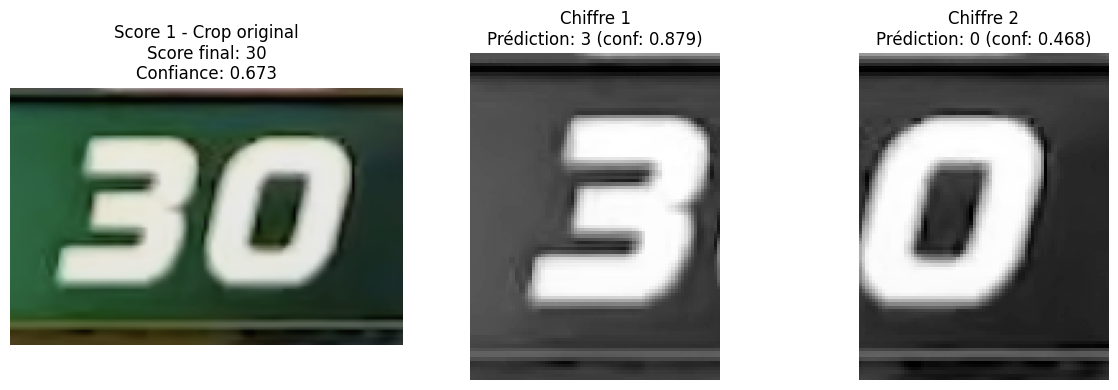

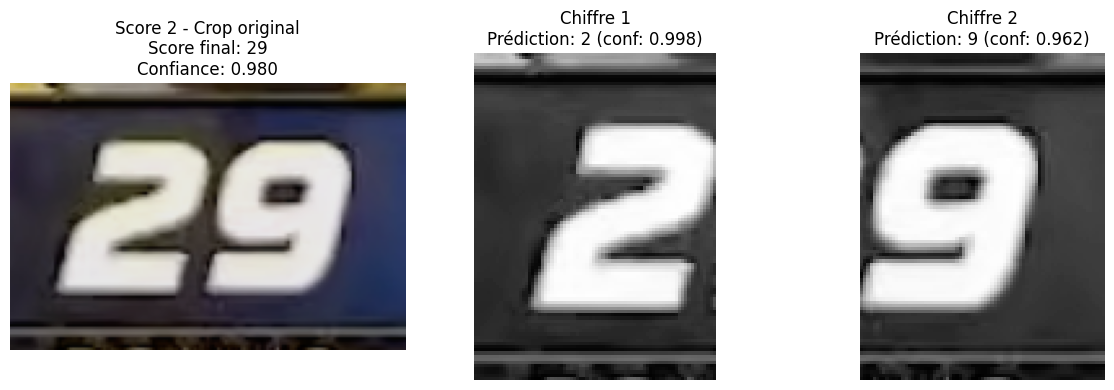


RÉSUMÉ POUR final6.png:
  Score 1: 30 (conf: 0.673)
  Score 2: 29 (conf: 0.980)

ANALYSE DE: final7.png
=== DÉTECTION DE SCORES - final7.png ===
Scores détectés: 3

--- SCORE 1 ---
Coordonnées: (440, 1426, 592, 1529)
Confiance détection: 0.924
Taille crop: 152x103
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 4 (conf: 0.935)
      Chiffre 2:
        DigitClassifier: 0 (conf: 0.612)
      Score final: 40 (conf: 0.773)
Chiffres segmentés: 2
Score final: 40 (conf: 0.773)

--- SCORE 2 ---
Coordonnées: (639, 1425, 792, 1528)
Confiance détection: 0.908
Taille crop: 153x103
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 3 (conf: 0.800)
      Chiffre 2:
        DigitClassifier: 7 (conf: 0.709)
      Score final: 37 (conf: 0.755)
Chiffres segmentés: 2
Score final: 37 (conf: 0.755)
Visualisation sauvegardée: output/visualisations/final7/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final7/visualisation_score_2.png


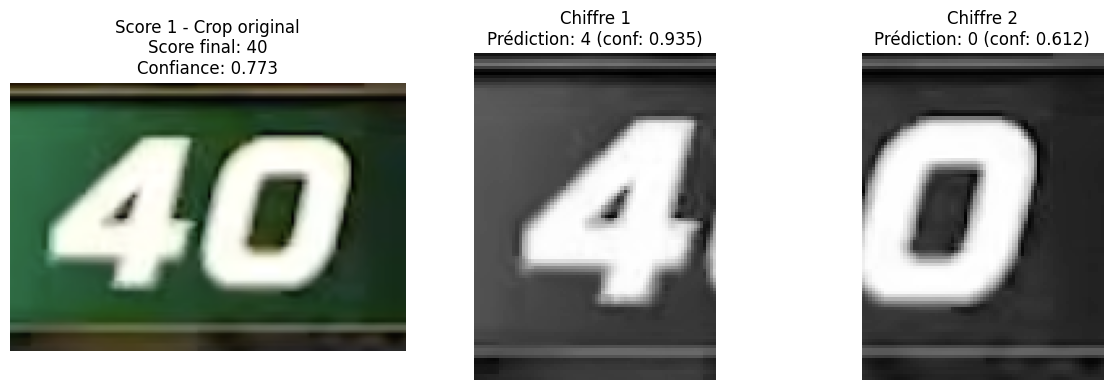

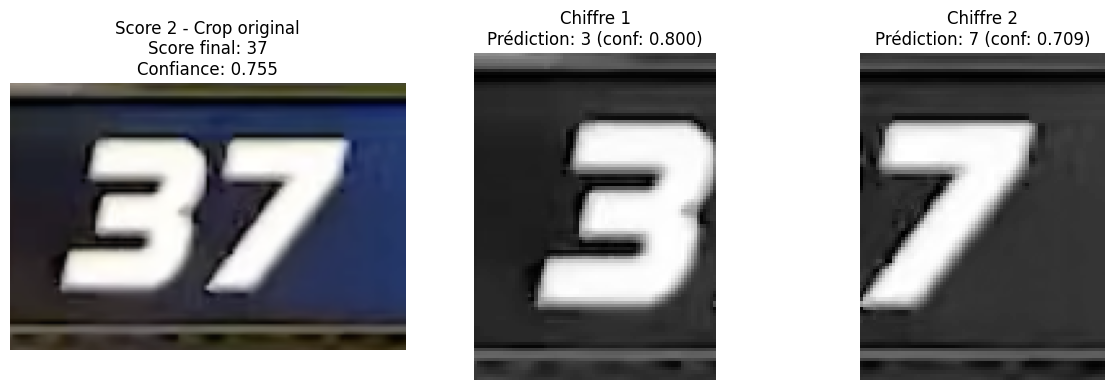


RÉSUMÉ POUR final7.png:
  Score 1: 40 (conf: 0.773)
  Score 2: 37 (conf: 0.755)

ANALYSE DE: final8.png
=== DÉTECTION DE SCORES - final8.png ===
Scores détectés: 2

--- SCORE 1 ---
Coordonnées: (2141, 1291, 2247, 1369)
Confiance détection: 0.787
Taille crop: 106x78
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 6 (conf: 0.413)
      Chiffre 2:
        DigitClassifier: 7 (conf: 0.798)
      Score final: 67 (conf: 0.606)
Chiffres segmentés: 2
Score final: 67 (conf: 0.606)

--- SCORE 2 ---
Coordonnées: (1861, 1292, 1970, 1373)
Confiance détection: 0.758
Taille crop: 109x81
    Division en 2 chiffres
      Chiffre 1:
        DigitClassifier: 6 (conf: 0.751)
      Chiffre 2:
        DigitClassifier: 7 (conf: 0.457)
      Score final: 67 (conf: 0.604)
Chiffres segmentés: 2
Score final: 67 (conf: 0.604)
Visualisation sauvegardée: output/visualisations/final8/visualisation_score_1.png
Visualisation sauvegardée: output/visualisations/final8/visualisation_score_2.png


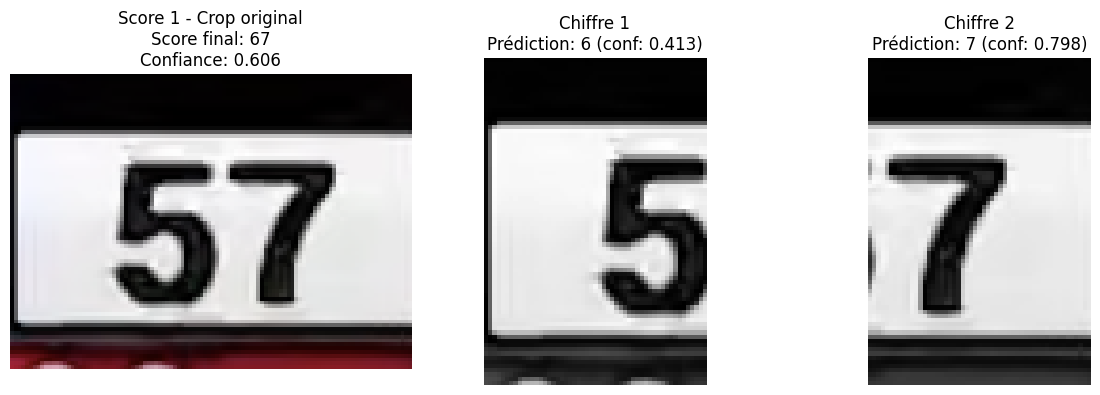

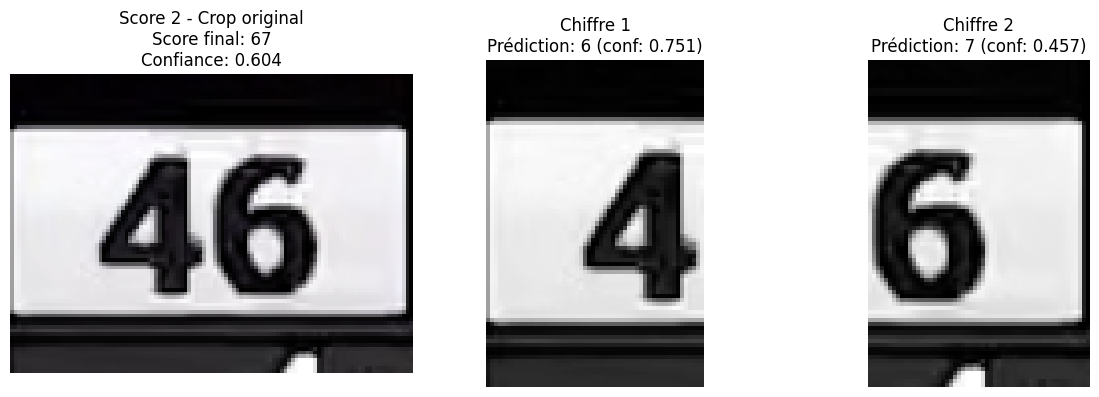


RÉSUMÉ POUR final8.png:
  Score 1: 67 (conf: 0.606)
  Score 2: 67 (conf: 0.604)


In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from detections.players import initialize_rfdetr_model

def predire_chiffre_avec_modele(region, model):
    """Prédit un chiffre avec le modèle DigitClassifier"""
    # Redimensionner à 28x28
    resized = cv2.resize(region, (28, 28))
    normalized = resized / 255.0
    
    # Format pour le modèle Conv2D
    input_data = normalized.reshape(1, 28, 28, 1)
    
    prediction = model.predict(input_data, verbose=0)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)
    
    return digit, confidence

def segmenter_chiffres_division_2(crop_gray, model_digit):
    """Segmente toujours en 2 chiffres par division"""
    
    print("    Division en 2 chiffres")
    
    # Diviser en 2 parties
    mid_x = crop_gray.shape[1] // 2
    left_digit = crop_gray[:, :mid_x]
    right_digit = crop_gray[:, mid_x:]
    
    if left_digit.shape[1] < 8 or right_digit.shape[1] < 8:
        print("      Division impossible - régions trop petites")
        return None
    
    digit_regions = [left_digit, right_digit]
    all_predictions = []
    
    for i, digit_region in enumerate(digit_regions):
        print(f"      Chiffre {i+1}:")
        
        # Prédiction avec DigitClassifier
        digit, confidence = predire_chiffre_avec_modele(digit_region, model_digit)
        
        print(f"        DigitClassifier: {digit} (conf: {confidence:.3f})")
        
        all_predictions.append({
            'digit': digit,
            'confidence': confidence,
            'all_predictions': {'DigitClassifier': (digit, confidence)}
        })
    
    # Score final
    final_score = all_predictions[0]['digit'] * 10 + all_predictions[1]['digit']
    final_confidence = np.mean([p['confidence'] for p in all_predictions])
    
    print(f"      Score final: {final_score} (conf: {final_confidence:.3f})")
    
    return {
        'digit_regions': digit_regions,
        'predictions': all_predictions,
        'final_score': final_score,
        'final_confidence': final_confidence
    }

def extraire_coordonnees_detection(detection):
    """Extrait les coordonnées d'une détection de manière robuste"""
    try:
        if hasattr(detection, 'xyxy'):
            coords = detection.xyxy[0]
            x1, y1, x2, y2 = coords.astype(int)
            confidence = detection.confidence[0] if hasattr(detection, 'confidence') else 0.0
        else:
            if len(detection) >= 4:
                coords = detection[0]
                if hasattr(coords, '__len__') and len(coords) >= 4:
                    x1, y1, x2, y2 = int(coords[0]), int(coords[1]), int(coords[2]), int(coords[3])
                else:
                    x1, y1, x2, y2 = int(coords[0]), int(coords[1]), int(coords[2]), int(coords[3])
                confidence = float(detection[2]) if len(detection) > 2 else 0.0
            else:
                print(f"Format de détection inattendu: {detection}")
                return None, None, None, None, None
    except Exception as e:
        print(f"Erreur extraction coordonnées: {e}")
        return None, None, None, None, None
    
    return x1, y1, x2, y2, confidence

def sauvegarder_visualisation(results, image_name, output_dir):
    """Sauvegarde exactement les images de visualisation"""
    
    if not results:
        print(f"Aucun résultat à sauvegarder pour {image_name}")
        return
    
    # Créer le dossier de sortie s'il n'existe pas
    os.makedirs(output_dir, exist_ok=True)
    
    # Créer un sous-dossier pour cette image
    image_base = os.path.splitext(image_name)[0]
    image_output_dir = os.path.join(output_dir, image_base)
    os.makedirs(image_output_dir, exist_ok=True)
    
    for i, result in enumerate(results):
        n_digits = len(result['digit_regions'])
        
        # Créer la figure exactement comme dans la visualisation
        fig, axes = plt.subplots(1, n_digits + 1, figsize=(4 * (n_digits + 1), 4))
        if n_digits == 0:
            axes = [axes]
        
        # Crop original
        axes[0].imshow(cv2.cvtColor(result['crop'], cv2.COLOR_BGR2RGB))
        axes[0].set_title(f'Score {i+1} - Crop original\nScore final: {result["final_score"]}\nConfiance: {result["final_confidence"]:.3f}')
        axes[0].axis('off')
        
        # Chiffres segmentés avec prédictions
        for j, digit_region in enumerate(result['digit_regions']):
            axes[j+1].imshow(digit_region, cmap='gray')
            
            # Récupérer les prédictions
            pred = result['predictions'][j]
            digit_pred = pred['digit']
            digit_conf = pred['confidence']
            
            axes[j+1].set_title(f'Chiffre {j+1}\nPrédiction: {digit_pred} (conf: {digit_conf:.3f})')
            axes[j+1].axis('off')
        
        plt.tight_layout()
        
        # Sauvegarder la figure
        output_path = os.path.join(image_output_dir, f"visualisation_score_{i+1}.png")
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        plt.close()  # Fermer la figure pour libérer la mémoire
        
        print(f"Visualisation sauvegardée: {output_path}")

def visualiser_crops_avec_predictions(results, image_name, save_to_file=False, output_dir=None):
    """Visualise les crops avec leurs prédictions et optionnellement sauvegarde"""
    
    if not results:
        print(f"Aucun résultat à visualiser pour {image_name}")
        return
    
    for i, result in enumerate(results):
        n_digits = len(result['digit_regions'])
        
        # Créer la figure
        fig, axes = plt.subplots(1, n_digits + 1, figsize=(4 * (n_digits + 1), 4))
        if n_digits == 0:
            axes = [axes]
        
        # Crop original
        axes[0].imshow(cv2.cvtColor(result['crop'], cv2.COLOR_BGR2RGB))
        axes[0].set_title(f'Score {i+1} - Crop original\nScore final: {result["final_score"]}\nConfiance: {result["final_confidence"]:.3f}')
        axes[0].axis('off')
        
        # Chiffres segmentés avec prédictions
        for j, digit_region in enumerate(result['digit_regions']):
            axes[j+1].imshow(digit_region, cmap='gray')
            
            # Récupérer les prédictions
            pred = result['predictions'][j]
            digit_pred = pred['digit']
            digit_conf = pred['confidence']
            
            axes[j+1].set_title(f'Chiffre {j+1}\nPrédiction: {digit_pred} (conf: {digit_conf:.3f})')
            axes[j+1].axis('off')
        
        plt.tight_layout()
        
        # Sauvegarder si demandé
        if save_to_file and output_dir:
            os.makedirs(output_dir, exist_ok=True)
            image_base = os.path.splitext(image_name)[0]
            output_path = os.path.join(output_dir, f"{image_base}_score_{i+1}.png")
            plt.savefig(output_path, dpi=150, bbox_inches='tight')
            print(f"Image sauvegardée: {output_path}")
        
        plt.show()

def detecter_scores_sur_image(image_path, players_model, model_digit, show_visualization=True, save_visualization=True, output_dir="output/visualisations"):
    """Détecte les scores sur une image spécifique"""
    
    # Charger l'image
    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Impossible de charger l'image: {image_path}")
        return []
    
    # Détecter les objets
    detections = players_model.predict(frame)
    
    # Filtrer les scores (classe 8)
    team_points_mask = detections.class_id == 8
    team_points_detections = detections[team_points_mask]
    
    print(f"=== DÉTECTION DE SCORES - {os.path.basename(image_path)} ===")
    print(f"Scores détectés: {len(team_points_detections)}")
    
    if len(team_points_detections) == 0:
        print("Aucun score détecté")
        return []
    
    # Prendre les 2 meilleures détections
    if len(team_points_detections) > 2:
        sorted_indices = np.argsort(team_points_detections.confidence)[::-1]
        team_points_detections = team_points_detections[sorted_indices[:2]]
    
    results = []
    
    for i, detection in enumerate(team_points_detections):
        try:
            # Extraire les coordonnées
            x1, y1, x2, y2, confidence = extraire_coordonnees_detection(detection)
            
            if x1 is None:
                print(f"Impossible d'extraire les coordonnées pour le score {i+1}")
                continue
            
            # Ajouter du padding
            padding = 15
            x1 = max(0, x1 - padding)
            y1 = max(0, y1 - padding)
            x2 = min(frame.shape[1], x2 + padding)
            y2 = min(frame.shape[0], y2 + padding)
            
            # Extraire le crop
            crop = frame[y1:y2, x1:x2]
            
            if crop.shape[0] > 20 and crop.shape[1] > 20:
                print(f"\n--- SCORE {i+1} ---")
                print(f"Coordonnées: ({x1}, {y1}, {x2}, {y2})")
                print(f"Confiance détection: {confidence:.3f}")
                print(f"Taille crop: {crop.shape[1]}x{crop.shape[0]}")
                
                # Convertir en niveaux de gris
                crop_gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
                
                # Segmentation par division en 2
                result = segmenter_chiffres_division_2(crop_gray, model_digit)
                
                if result is None:
                    print("Division impossible")
                    continue
                
                print(f"Chiffres segmentés: {len(result['digit_regions'])}")
                print(f"Score final: {result['final_score']} (conf: {result['final_confidence']:.3f})")
                
                results.append({
                    'crop': crop,
                    'coordinates': (x1, y1, x2, y2),
                    'digit_regions': result['digit_regions'],
                    'predictions': result['predictions'],
                    'final_score': result['final_score'],
                    'final_confidence': result['final_confidence']
                })
                
        except Exception as e:
            print(f"Erreur traitement score {i+1}: {e}")
            import traceback
            traceback.print_exc()
    
    # Sauvegarder les visualisations si demandé
    if save_visualization and results:
        sauvegarder_visualisation(results, os.path.basename(image_path), output_dir)
    
    # Visualiser les résultats si demandé
    if show_visualization and results:
        visualiser_crops_avec_predictions(results, os.path.basename(image_path))
    
    return results

def analyser_images_finales_avec_visualisation():
    """Analyse les images final1 à final8 avec visualisation et sauvegarde"""
    
    # Charger les modèles une seule fois
    print("Chargement des modèles...")
    players_model = initialize_rfdetr_model('./models/checkpoint_best_total.pth')
    model_digit = load_model('./models/DigitClassifier.keras')
    print("Modèles chargés")
    
    # Dossier des images
    images_dir = "input/images_input"
    output_dir = "output/visualisations"
    
    # Créer le dossier de sortie
    os.makedirs(output_dir, exist_ok=True)
    
    # Créer la liste des images final1 à final8
    image_files = []
    for i in range(1, 9):
        # Essayer différentes extensions
        for ext in ['.jpg', '.jpeg', '.png']:
            image_path = os.path.join(images_dir, f"final{i}{ext}")
            if os.path.exists(image_path):
                image_files.append(f"final{i}{ext}")
                break
        else:
            print(f"Image final{i} non trouvée")
    
    print(f"\n=== ANALYSE DE {len(image_files)} IMAGES FINALES ===")
    print(f"Visualisations sauvegardées dans: {output_dir}")
    
    all_results = {}
    
    for image_file in image_files:
        image_path = os.path.join(images_dir, image_file)
        print(f"\n{'='*60}")
        print(f"ANALYSE DE: {image_file}")
        print(f"{'='*60}")
        
        # Analyser l'image avec visualisation et sauvegarde
        results = detecter_scores_sur_image(image_path, players_model, model_digit, 
                                          show_visualization=True, save_visualization=True, output_dir=output_dir)
        all_results[image_file] = results
        
        # Afficher un résumé
        if results:
            print(f"\nRÉSUMÉ POUR {image_file}:")
            for i, result in enumerate(results):
                print(f"  Score {i+1}: {result['final_score']} (conf: {result['final_confidence']:.3f})")
        else:
            print(f"Aucun score détecté dans {image_file}")
    
    return all_results

# Exécuter l'analyse avec visualisation et sauvegarde
all_results = analyser_images_finales_avec_visualisation()

### Detection de changement de score

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.


reinitializing detection head with 9 classes


Loading pretrain weights


 Modèle RF-DETR optimisé pour l'inférence
  Modèle sur CPU


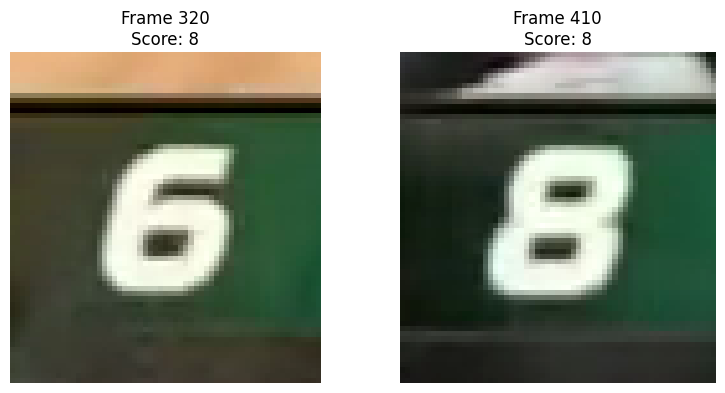

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from detections.players import initialize_rfdetr_model

def detecter_scores_frames(video_path, frame_indices):
    """Détecte les scores sur plusieurs frames avec le modèle dense_ultra"""
    
    # Charger les modèles
    players_model = initialize_rfdetr_model('./models/checkpoint_best_total.pth')
    model_digit = load_model('./models/digits_dense_ultra.h5')
    
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erreur: Impossible d'ouvrir la vidéo {video_path}")
        return
    
    results = []
    
    for frame_index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        detections = players_model.predict(frame)
        
        # Filtrer les Team Points (classe 8)
        team_points_mask = detections.class_id == 8
        team_points_detections = detections[team_points_mask]
        
        if len(team_points_detections) == 0:
            continue
        
        # Prendre la meilleure détection
        team_points_list = []
        for i in range(len(team_points_detections)):
            team_points_list.append(team_points_detections[i])
        
        best_detection = team_points_list[0]
        if len(team_points_list) > 1:
            confidences = []
            for det in team_points_list:
                try:
                    if hasattr(det, 'confidence'):
                        conf = det.confidence
                    else:
                        conf = float(det[4]) if len(det) > 4 else 0.0
                    confidences.append(conf)
                except:
                    confidences.append(0.0)
            
            best_idx = np.argmax(confidences)
            best_detection = team_points_list[best_idx]
        
        try:
            # Extraire les coordonnées
            x1, y1, x2, y2, confidence = extraire_coordonnees_detection(best_detection)
            
            if x1 is None:
                continue
            
            padding = 15
            x1 = max(0, x1 - padding)
            y1 = max(0, y1 - padding)
            x2 = min(frame.shape[1], x2 + padding)
            y2 = min(frame.shape[0], y2 + padding)
            
            # Extraire le crop
            crop = frame[y1:y2, x1:x2]
            
            if crop.shape[0] > 20 and crop.shape[1] > 20:
                crop_gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
                
                # Prédire le score avec le modèle dense
                resized = cv2.resize(crop_gray, (28, 28))
                normalized = resized / 255.0
                input_data = normalized.reshape(1, 784)
                prediction = model_digit.predict(input_data, verbose=0)
                score = np.argmax(prediction)
                
                results.append({
                    'frame': frame_index, 
                    'crop': crop, 
                    'score': score
                })
                
        except Exception as e:
            continue
    
    cap.release()
    
    if len(results) == 0:
        print("Aucun score détecté")
        return
    
    n_crops = len(results)
    fig, axes = plt.subplots(1, n_crops, figsize=(4 * n_crops, 4))
    
    if n_crops == 1:
        axes = [axes]
    
    for i, result in enumerate(results):
        axes[i].imshow(cv2.cvtColor(result['crop'], cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'Frame {result["frame"]}\nScore: {result["score"]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return results


frames = [320, 410]
results = detecter_scores_frames("input/videos_input/video_test 2.mp4", frames)

## **Conclusion**

Les modèles de réseaux de neurones sont performants sur la détection de chiffres et fonctionnent bien sur de nombreux exemples de crops aléatoires extraits des matchs. Cependant, dans cet exemple de changement de score en 2 points, on passe de 6 à 8, et le modèle détecte mal le changement. Cela est dû au dataset qui n'est pas optimisé sur les polices des scores de la NBA. La fine-tuning du modèle sur ce type de datasets spécifiques est donc une des pistes d'amélioration.